In [1]:
from torchvision.datasets import MNIST, FashionMNIST, CIFAR10
from torch.optim import SGD, Adam
from torch.nn import CrossEntropyLoss, MSELoss

# from pennylane import NesterovMomentumOptimizer
from qcnn.qcnn import QCNN

from qcnn.ml.data import Data, BinaryData
from qcnn.ml.optimize import Optimizer
from qcnn.ml.data import image_transform
from qcnn.experiment import Experiment
from qcnn.cnn import CNN

from pathlib import Path
from qcnn.file import save_dataframe_as_csv

from qcnn.quantum.operation.ansatz.convolution.v6 import ConvolutionAnsatz as Ansatz

In [2]:
# Meta parameters
name = "new_fully_connected"
path = Path(f"results/{name}")
num_trials = 10
silent = False
is_quantum = True

# Ansatz parameters
dims = (16, 16)
num_layers = 3

2023-06-10 23:15:14,746: (qcnn) Circuit ID: new_fully_connected


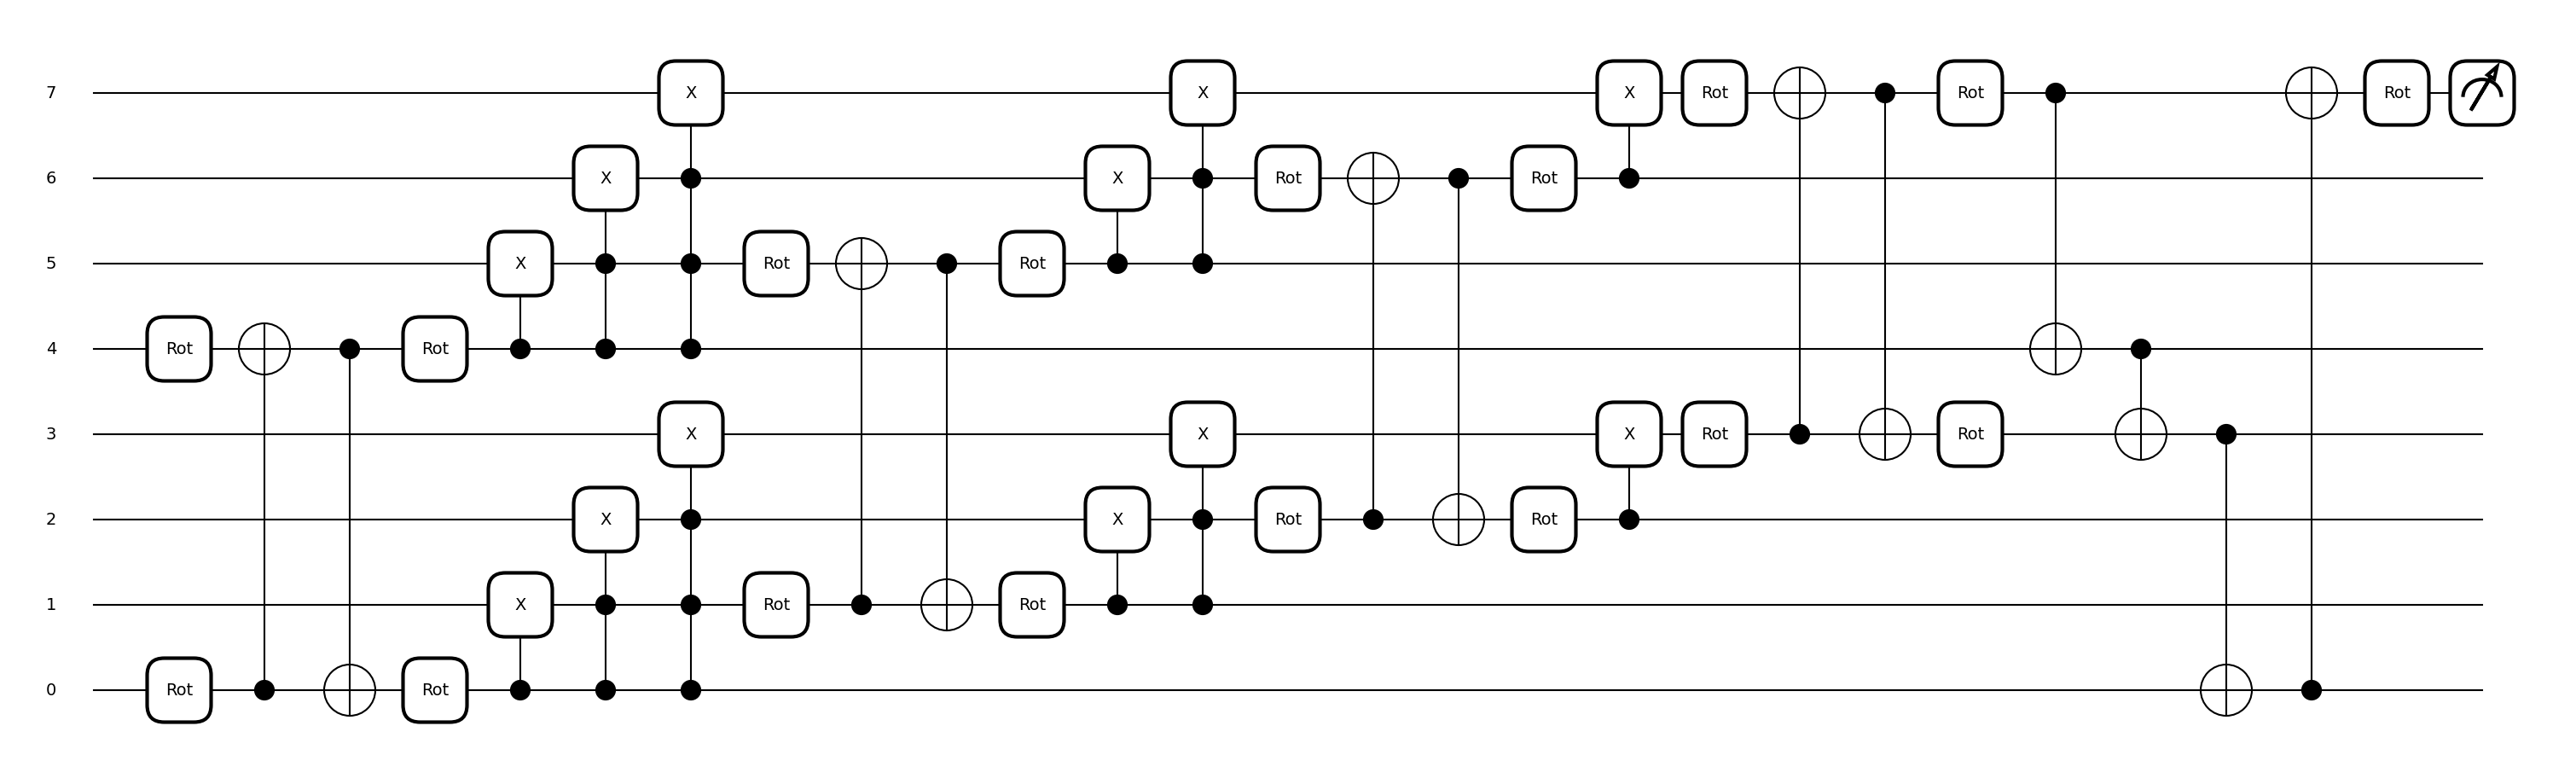

In [3]:
# Create model
cls = QCNN if is_quantum else CNN
data = BinaryData(FashionMNIST, image_transform(dims, flatten=is_quantum), batch_size=(500, 0))
optimizer = Optimizer(Adam)
loss = CrossEntropyLoss()
epoch = 25
model = cls.with_logging(data, optimizer, loss, epoch=epoch)

# Log circuit ID
model.logger.info(f"Circuit ID: {name}")

# Save circuit drawing
if is_quantum:
    model.ansatz = Ansatz.from_dims(dims, num_layers=num_layers)
    filename = path.with_stem(f"{name}_circuit").with_suffix(".png")
    model.ansatz.draw(filename=filename, decompose=True)

In [4]:
# Run experiment
experiment = Experiment(model, num_trials, results_schema=["accuracy"])

args = (Ansatz,) if is_quantum else ()
results = experiment(*args, dims, num_layers=num_layers, silent=silent)

2023-06-10 23:15:15,339: (qcnn_trial_0) Number of Parameters: 51
2023-06-10 23:17:20,516: (qcnn_trial_0) Accuracy: 77.050%
2023-06-10 23:17:20,538: (qcnn_trial_1) Number of Parameters: 51
2023-06-10 23:19:29,014: (qcnn_trial_1) Accuracy: 94.300%
2023-06-10 23:19:29,033: (qcnn_trial_2) Number of Parameters: 51
2023-06-10 23:21:38,318: (qcnn_trial_2) Accuracy: 94.750%
2023-06-10 23:21:38,340: (qcnn_trial_3) Number of Parameters: 51
2023-06-10 23:23:50,040: (qcnn_trial_3) Accuracy: 92.450%
2023-06-10 23:23:50,059: (qcnn_trial_4) Number of Parameters: 51


KeyboardInterrupt: 

In [ ]:
# Save and print accuracy results
save_dataframe_as_csv(path.with_suffix(".csv"), results)
acc = results["accuracy"]
print(acc.median(), acc.mean(), acc.std())

In [ ]:
# Save aggregated loss history figure
(fig,) = experiment.draw()
fig.savefig(path.with_suffix(".png"))

Variables to consider:
- __batch, epoch__
- Operation on "ancilla" qubits (pre, post, none)
- Filter Ansatz
- Fully-connected Ansatz
- Which qubits to apply Fully-connected
- Which qubits to measure